## Frequencies plotter

In this notebook we load the stored data of frequencies between teams and plot them. The basic structure of the code is to read and then to plot.

First, we import the required libraries.

In [1]:
import asyncio
import sys

if sys.platform.startswith('win'):
    asyncio.set_event_loop_policy(asyncio.WindowsSelectorEventLoopPolicy())

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

Read the stored NetCDF4 file, where the data is stored.

In [3]:
# Llegim les dades
dataarray = xr.open_dataset('teammates.nc', engine='scipy')
dataarray

<xarray.Dataset> Size: 18kB
Dimensions:              (teammate: 18, player: 18)
Coordinates:
  * teammate             (teammate) object 144B 'Alejandro' 'Antía' ... 'Víctor'
  * player               (player) object 144B 'Alejandro' 'Antía' ... 'Víctor'
Data variables:
    Teammates            (teammate, player) float64 3kB ...
    TeammatesPlayed      (teammate, player) float64 3kB ...
    TeammatesWins        (teammate, player) float64 3kB ...
    TeammatesWinsPlayed  (teammate, player) float64 3kB ...
    CloseWins            (teammate, player) float64 3kB ...
    CloseMatches         (teammate, player) float64 3kB ...
    CloseWinsPlayed      (teammate, player) float64 3kB ...

Store the list of all the players.

In [4]:
# List of all player names (ordered)
players_names = dataarray.player.values

Define a function that will plot the heatmap of each parameter.

In [5]:
# Function to plot the heatmaps
def heatmap_frequencies(matrix, ax, cmap = 'YlGn'):
    # Plot heatmap
    if cmap == 'RdYlGn':
        ax.imshow(matrix, cmap = cmap, aspect = 'equal', vmin = 0, vmax = 1)
    else:
        ax.imshow(matrix, cmap = cmap, aspect = 'equal')
    
    # Show the values at each cell
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            value = matrix[i,j] # value at that cell

            if np.isnan(value):
                continue
            else:
                if isinstance(value, float): # if values are float
                    ax.text(j, i, "{:.2f}".format(value), ha='center', va='center', fontsize=7, color="black")
                else: # if values are other (int)
                    ax.text(j, i, "{:d}".format(value), ha='center', va='center', fontsize=7, color="black")
        

Plotting. First, select the parameters to plot, and store their corresponding numpy arrays (matrices). We filter the 0 values in the ratio between wins and played games for plotting purposes. Then, initialize the figure and plot each colormap using the previouly-defined function.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16140\902406398.py:10: RuntimeWarning: invalid value encountered in cast
  teammates = np.where(np.isnan(teammates), np.nan, teammates.astype(int))
C:\Users\Admin\AppData\Local\Temp\ipykernel_16140\902406398.py:11: RuntimeWarning: invalid value encountered in cast
  teammates_wins = np.where(np.isnan(teammates_wins), np.nan, teammates_wins.astype(int))
C:\Users\Admin\AppData\Local\Temp\ipykernel_16140\902406398.py:12: RuntimeWarning: invalid value encountered in cast
  teammatesclosematches = np.where(np.isnan(teammatesclosematches), np.nan, teammatesclosematches.astype(int))


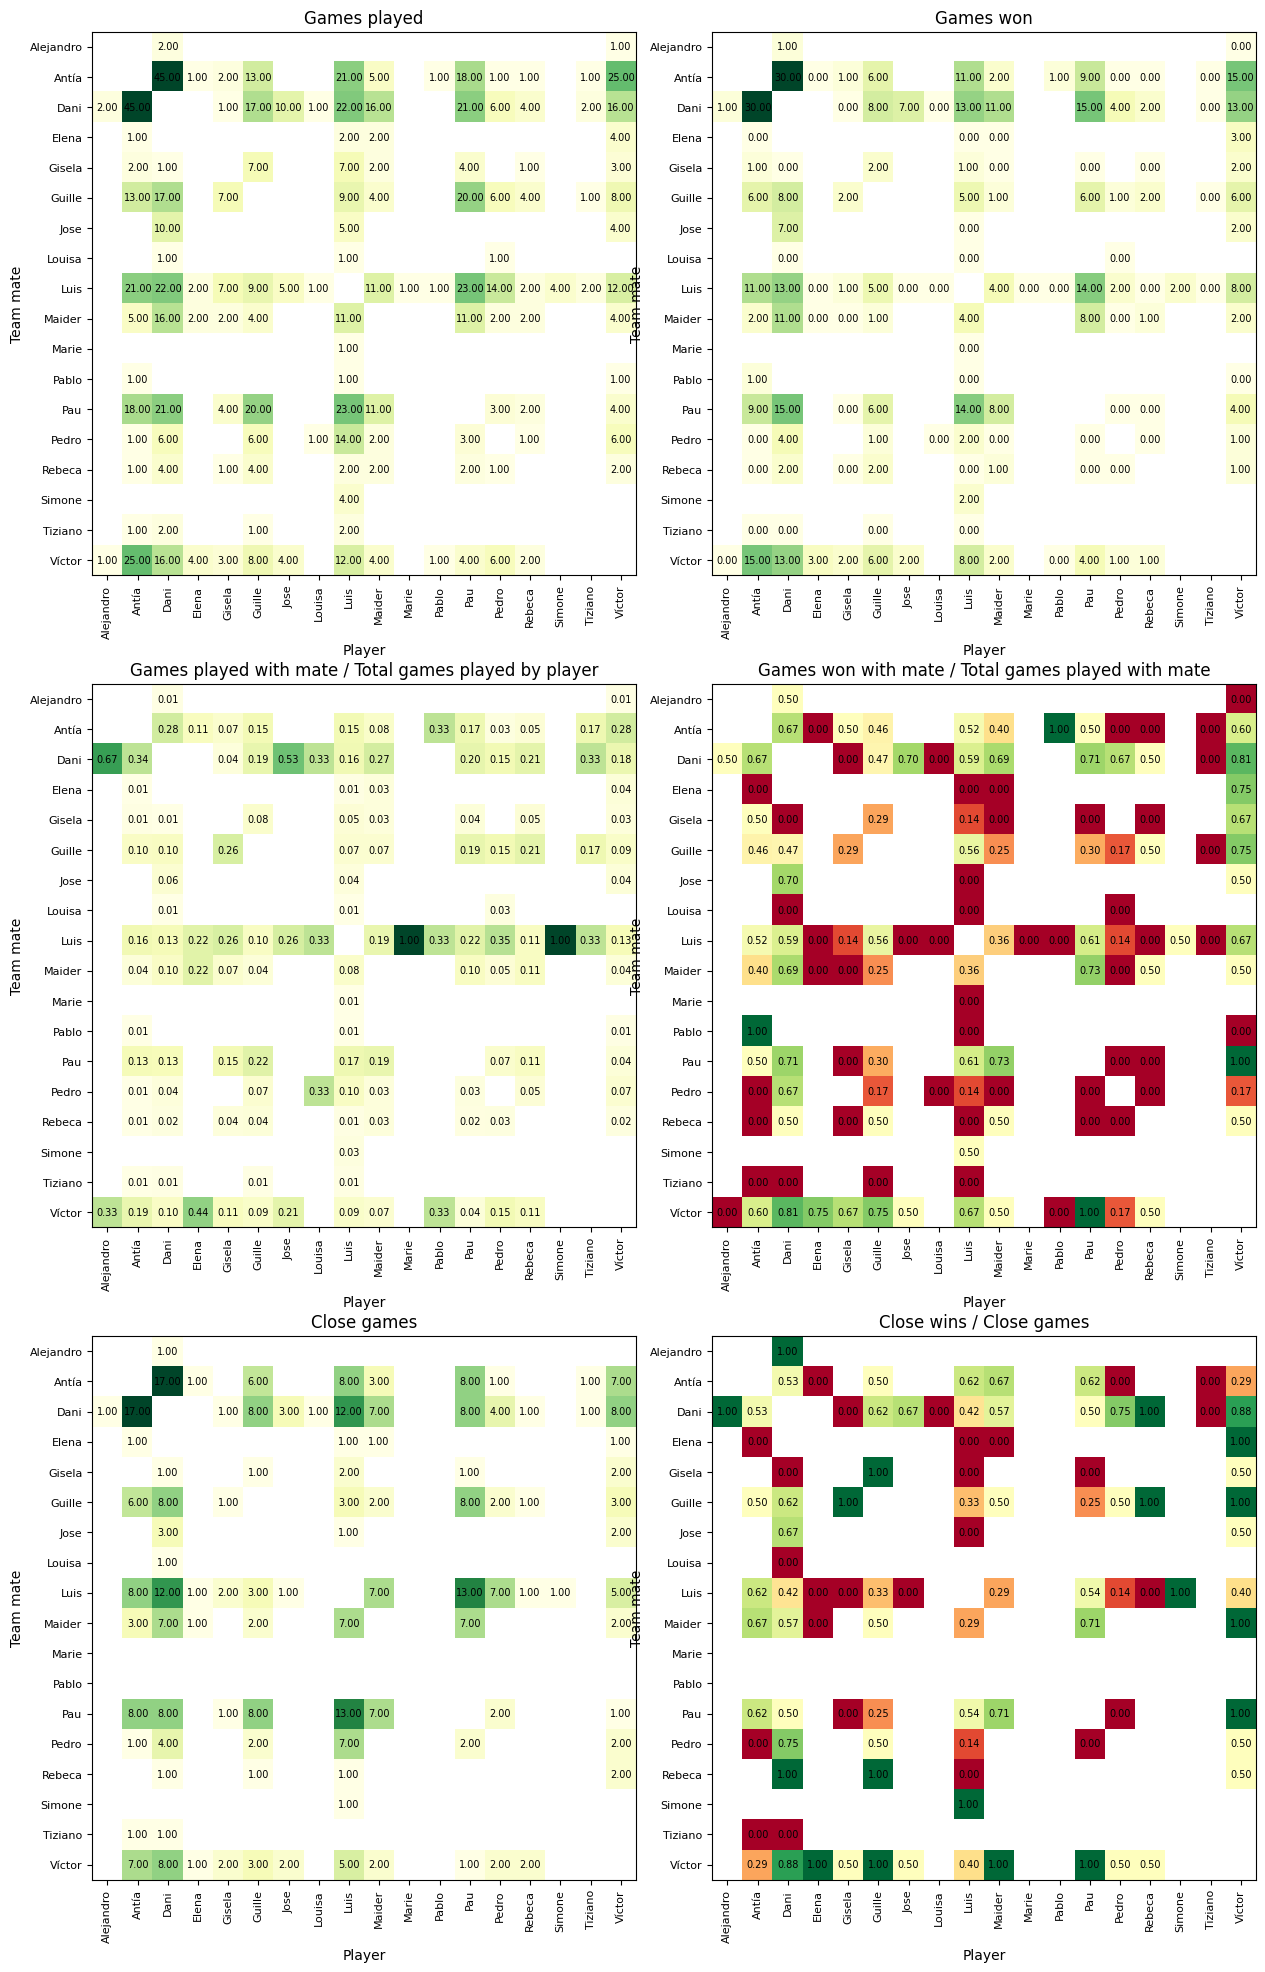

In [6]:
# Read the parameters to plot
teammates = dataarray['Teammates'].values # number of games played with each teammate
teammates_wins = dataarray['TeammatesWins'].values # number of games won with each teammate
teammatesplayed = dataarray['TeammatesPlayed'].values # percentage of games played with each mate wrt the total games played by player
teammatesplayed_wins = dataarray['TeammatesWinsPlayed'].values # percentage of games played with each mate wrt the total games played by player
teammatesclosematches = dataarray['CloseMatches'].values # number of close matches played with each teammate
teammatesclosewins_played = dataarray['CloseWinsPlayed'].values # relative number of close matches won with each teammate

# Convert values to int while keeping NaNs in selected parameters
teammates = np.where(np.isnan(teammates), np.nan, teammates.astype(int))
teammates_wins = np.where(np.isnan(teammates_wins), np.nan, teammates_wins.astype(int))
teammatesclosematches = np.where(np.isnan(teammatesclosematches), np.nan, teammatesclosematches.astype(int))

# Initialize figure
fig, axs = plt.subplots(figsize=(16,16*3/2), ncols = 2, nrows = 3)
plt.subplots_adjust(wspace=0.)
axs = axs.flatten()

# Plot each parameter
heatmap_frequencies(teammates, axs[0])
heatmap_frequencies(teammates_wins, axs[1])
heatmap_frequencies(teammatesplayed, axs[2])
heatmap_frequencies(teammatesplayed_wins, axs[3], cmap = 'RdYlGn') # la parella més efectiva és la que té aquest valor més alt
heatmap_frequencies(teammatesclosematches, axs[4]) # la parella més efectiva és la que té aquest valor més alt
heatmap_frequencies(teammatesclosewins_played, axs[5], cmap = 'RdYlGn') # la parella més efectiva és la que té aquest valor més alt

# Add tick labels
axs[0].set_title("Games played")
axs[1].set_title("Games won")
axs[2].set_title("Games played with mate / Total games played by player")
axs[3].set_title("Games won with mate / Total games played with mate")
axs[4].set_title("Close games")
axs[5].set_title("Close wins / Close games")

for i in range(6):
    axs[i].set_xticks(ticks=np.arange(len(players_names)))
    axs[i].set_xticklabels(players_names, rotation=90, fontsize=8)
    axs[i].set_yticks(ticks=np.arange(len(players_names)))
    axs[i].set_yticklabels(players_names, rotation=0, fontsize=8)

    axs[i].set_ylabel("Team mate")
    axs[i].set_xlabel("Player")

plt.savefig('results/frequencies.png', dpi=300, bbox_inches='tight')

In [7]:
dataarray.close()